In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [232]:
table_headers = ['Stellar Mass [M☉]', 'Luminosity [L☉]', 'Effective Temperature [K]', 'Radius [R☉]', 'Energy Generation', 'Opacity [cm^2/g]', 'Mean Molar Mass [g/mol]','Core Pressure [Ba]', 'Core Temperature [K]', 'Core Density [g/cm^3]']
#stelmass = [0.5,1,2,5,10,20]
#luminosity = [0.036839,1.5939,36.127,1155.4,11144,94481]
#temp = [4115.6,9969.2,18110,30534,41131,53635]
#radius = [2.6331E10,2.9518E10,4.2585E10,8.4718E10,1.45E11,2.4829E11]
#log_lum = np.log10(luminosity)
#log_temp = np.log10(temp)
#log_rad = np.log10(radius)
#log_nrgeff = [0.068,1.374,3.068,4.209,4.865,5.462]
#log_opacity = [1.197,0.485,-0.015,-0.341,-0.423,-0.448]
#mean_mol_mass = [0.597,0.597,0.597,0.597,0.597,0.597]
#log_core_P = [16.732,17.135,17.101,16.702,16.370,16.038]
#log_core_temp = [6.957,7.208,7.350,7.449,7.517,7.584]
#log_core_density = [1.631,1.783,1.607,1.109,0.710,0.310]

In [270]:
df_control = pd.read_csv('control.csv', header=0)
control_mass_data = df_control['Stellar Mass [M☉]'][:]
control_metal_data = df_control['Metal Fraction'][:]
control_lum_data = df_control['Luminosity [L☉]'][:]
control_rad_data = df_control['Radius [cm]'][:]
control_press_data = df_control['Core Pressure [Ba]'][:]
control_temp_data = df_control['Core Temperature [K]'][:]
control_dens_data = df_control['Core Density [g/cm^3]'][:]

df_constmass_chngmetal = pd.read_csv('constmass_chngmetal.csv', header=0)
constmass_chngmetal_mass_data = df_constmass_chngmetal['Stellar Mass [M☉]'][:]
constmass_chngmetal_metal_data = df_constmass_chngmetal['Metal Fraction'][:]
constmass_chngmetal_lum_data = df_constmass_chngmetal['Luminosity [L☉]'][:]
constmass_chngmetal_rad_data = df_constmass_chngmetal['Radius [cm]'][:]
constmass_chngmetal_engen_data = df_constmass_chngmetal_noautofit['Energy Generation'][:]
constmass_chngmetal_press_data = df_constmass_chngmetal['Core Pressure [Ba]'][:]
constmass_chngmetal_temp_data = df_constmass_chngmetal['Core Temperature [K]'][:]
constmass_chngmetal_dens_data = df_constmass_chngmetal['Core Density [g/cm^3]'][:]

df_chngmass_maxmetal = pd.read_csv('chngmass_maxmetal.csv', header=0)
chngmass_maxmetal_mass_data = df_chngmass_maxmetal['Stellar Mass [M☉]'][:]
chngmass_maxmetal_metal_data = df_chngmass_maxmetal['Metal Fraction'][:]
chngmass_maxmetal_lum_data = df_chngmass_maxmetal['Luminosity [L☉]'][:]
chngmass_maxmetal_rad_data = df_chngmass_maxmetal['Radius [cm]'][:]
chngmass_maxmetal_press_data = df_chngmass_maxmetal['Core Pressure [Ba]'][:]
chngmass_maxmetal_temp_data = df_chngmass_maxmetal['Core Temperature [K]'][:]
chngmass_maxmetal_dens_data = df_chngmass_maxmetal['Core Density [g/cm^3]'][:]

df_constmass_chngmetal_noautofit = pd.read_csv('constmass_chngmetal_noautofit.csv', header=0)
constmass_chngmetal_noautofit_mass_data = df_constmass_chngmetal_noautofit['Stellar Mass [M☉]'][:]
constmass_chngmetal_noautofit_metal_data = df_constmass_chngmetal_noautofit['Metal Fraction'][:]
constmass_chngmetal_noautofit_lum_data = df_constmass_chngmetal_noautofit['Luminosity [L☉]'][:]
constmass_chngmetal_noautofit_rad_data = df_constmass_chngmetal_noautofit['Radius [cm]'][:]
constmass_chngmetal_noautofit_engen_data = df_constmass_chngmetal_noautofit['Energy Generation'][:]
constmass_chngmetal_noautofit_press_data = df_constmass_chngmetal_noautofit['Core Pressure [Ba]'][:]
constmass_chngmetal_noautofit_temp_data = df_constmass_chngmetal_noautofit['Core Temperature [K]'][:]
constmass_chngmetal_noautofit_dens_data = df_constmass_chngmetal_noautofit['Core Density [g/cm^3]'][:]

In [271]:
df_control

,Stellar Mass [M☉],Helium Fraction,Metal Fraction,Luminosity [L☉],Effective Temperature [K],Radius [cm],Energy Generation,Opacity [cm^2/g],Mean Molar Mass [g/mol],Core Pressure [Ba],Core Temperature [K],Core Density [g/cm^3]
0,0.5,0.24,0.02,-1.433692,3.614433,10.420467,0.068,1.197,0.597,16.732,6.957,1.631
1,1.0,0.24,0.02,0.202461,3.998660,10.470087,1.374,0.485,0.597,17.135,7.208,1.783
2,2.0,0.24,0.02,1.557832,4.257918,10.629257,3.068,-0.015,0.597,17.101,7.350,1.607
3,5.0,0.24,0.02,3.062732,4.484784,10.927976,4.209,-0.341,0.597,16.702,7.449,1.109
4,10.0,0.24,0.02,4.047041,4.614169,11.161368,4.865,-0.423,0.597,16.370,7.517,0.710
5,20.0,0.24,0.02,4.975344,4.729448,11.394959,5.462,-0.448,0.597,16.038,7.584,0.310


In [272]:
df_constmass_chngmetal

,Stellar Mass [M☉],Helium Fraction,Metal Fraction,Luminosity [L☉],Effective Temperature [K],Radius [cm],Energy Generation,Opacity [cm^2/g],Mean Molar Mass [g/mol],Core Pressure [Ba],Core Temperature [K],Core Density [g/cm^3]
0,1,0.24,0.05,-0.040,3.921,10.5040,1.146,0.764,0.611,16.998,7.183,1.680
1,1,0.24,0.10,-0.182,3.874,10.5270,1.054,0.972,0.635,16.909,7.178,1.614
2,1,0.24,0.15,-0.210,3.863,10.5353,1.130,1.067,0.661,16.875,7.187,1.588
3,1,0.24,0.20,-0.189,3.865,10.5410,1.297,1.113,0.690,16.852,7.200,1.571
4,1,0.24,0.30,-0.072,3.887,10.5570,1.671,1.132,0.755,16.789,7.223,1.523
5,1,0.24,0.40,0.120,3.924,10.5790,1.990,1.905,0.833,16.700,7.244,1.457


In [273]:
df_chngmass_maxmetal

,Stellar Mass [M☉],Helium Fraction,Metal Fraction,Luminosity [L☉],Effective Temperature [K],Radius [cm],Energy Generation,Opacity [cm^2/g],Mean Molar Mass [g/mol],Core Pressure [Ba],Core Temperature [K],Core Density [g/cm^3]
0,0.5,0.24,0.4,-1.318,3.625,10.425,0.111,1.735,0.833,16.714,7.097,1.618
1,1.0,0.24,0.4,0.120,3.924,10.579,1.990,1.905,0.833,16.700,7.244,1.457
2,2.0,0.24,0.4,1.569,4.178,10.795,3.170,0.538,0.833,16.436,7.329,1.109
3,5.0,0.24,0.4,3.389,4.488,11.084,4.546,-0.089,0.833,16.077,7.438,0.640
4,10.0,0.24,0.4,4.584,4.676,11.307,5.403,-0.381,0.833,15.788,7.516,0.273
5,20.0,0.24,0.4,5.614,4.819,11.535,6.098,-0.507,0.833,15.478,7.589,-0.110


In [274]:
df_constmass_chngmetal_noautofit

,Stellar Mass [M☉],Helium Fraction,Metal Fraction,Luminosity [L☉],Effective Temperature [K],Radius [cm],Energy Generation,Opacity [cm^2/g],Mean Molar Mass [g/mol],Core Pressure [Ba],Core Temperature [K],Core Density [g/cm^3]
0,1,0.24,0.05,0.196,3.999,10.467,1.457,0.771,0.611,17.135,7.208,1.793
1,1,0.24,0.10,0.184,3.998,10.461,1.561,1.028,0.635,17.135,7.208,1.810
2,1,0.24,0.15,0.170,3.998,10.455,1.638,1.189,0.661,17.135,7.208,1.827
3,1,0.24,0.20,0.154,3.997,10.449,1.696,1.307,0.690,17.135,7.208,1.846
4,1,0.24,0.30,0.113,3.993,10.436,1.772,1.478,0.755,17.135,7.208,1.885
5,1,0.24,0.40,0.054,3.986,10.422,1.803,1.603,0.833,17.135,7.208,1.928


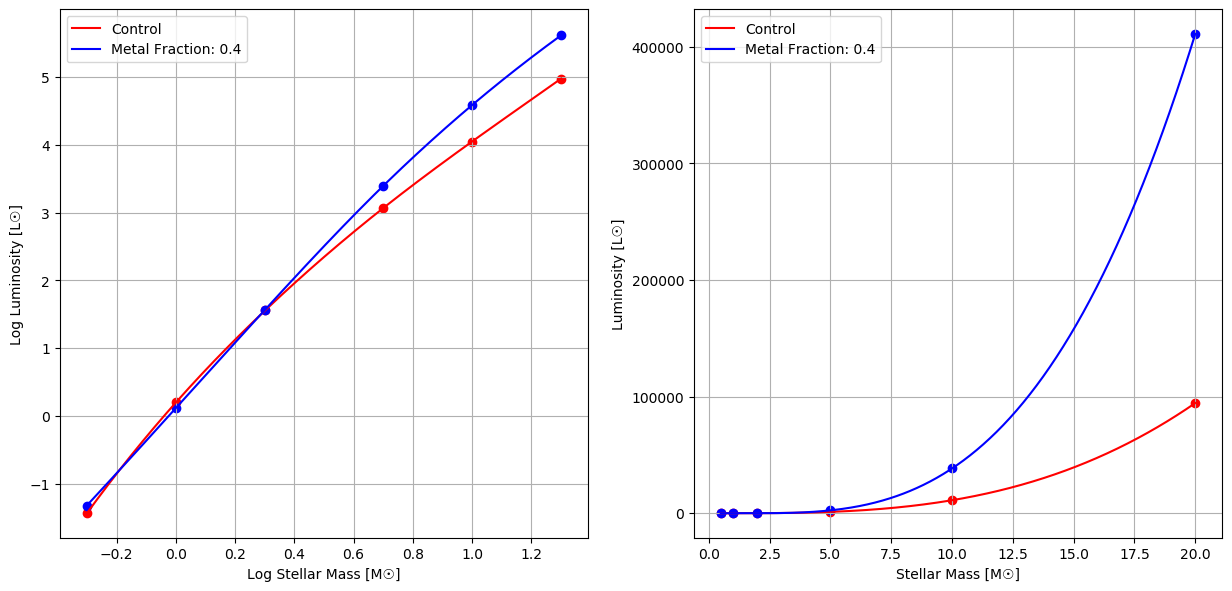

In [275]:
x1 = np.log10(control_mass_data)
x2 = np.log10(chngmass_maxmetal_mass_data)
x3 = control_mass_data
x4 = chngmass_maxmetal_mass_data
y1 = control_lum_data
y2 = chngmass_maxmetal_lum_data
y3 = 10**control_lum_data
y4 = 10**chngmass_maxmetal_lum_data

a,b,c,m,q,u = np.polyfit(x1,y1,5)
d,e,f,n,r,v = np.polyfit(x2,y2,5)
g,h,i,o,s = np.polyfit(x3,y3,4)
j,k,l,p,t = np.polyfit(x3,y4,4)

z1 = a*x1**5 + b*x1**4 + c*x1**3 + m*x1**2 + q*x1 + u
z2 = d*x2**5 + e*x2**4 + f*x2**3 + n*x2**2 + r*x1 + v
z3 = g*x3**4 + h*x3**3 + i*x3**2 + o*x3 + s
z4 = j*x4**4 + k*x4**3 + l*x4**2 + p*x4 + t

x1_z1_spline = make_interp_spline(x1, z1)
x2_z2_spline = make_interp_spline(x2, z2)
x3_z3_spline = make_interp_spline(x3, z3)
x3_z4_spline = make_interp_spline(x3, z4)

x1_ = np.linspace(x1.min(), x1.max(), 500)
z1_ = x1_z1_spline(x1_)
x2_ = np.linspace(x2.min(), x2.max(), 500)
z2_ = x2_z2_spline(x2_)
x3_ = np.linspace(x3.min(), x3.max(), 500)
z3_ = x1_z3_spline(x3_)
x4_ = np.linspace(x4.min(), x4.max(), 500)
z4_ = x2_z4_spline(x4_)

fig, ax = plt.subplots(1,2, figsize=(15,10))

ax[0].scatter(x1, y1, c='red', marker='o')
ax[0].scatter(x2, y2, c='blue', marker='o')
ax[1].scatter(x3, y3, c='red', marker='o')
ax[1].scatter(x4, y4, c='blue', marker='o')

ax[0].plot(x1_, z1_, c='red', label='Control')
ax[0].plot(x2_, z2_, c='blue', label='Metal Fraction: 0.4')
ax[1].plot(x3_, z3_, c='red', label='Control')
ax[1].plot(x4_, z4_, c='blue', label='Metal Fraction: 0.4')

ax[0].set_xlabel('Log Stellar Mass [M☉]')
ax[0].set_ylabel('Log Luminosity [L☉]')
ax[1].set_xlabel('Stellar Mass [M☉]')
ax[1].set_ylabel('Luminosity [L☉]')

#ax[0].set_yscale('log')
#ax[0].set_yscale('log')

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.dpi'] = 100

ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box')
ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')

ax[0].grid(True,'minor',alpha=0.3)

ax[0].grid()
ax[1].grid()

ax[0].legend()
ax[1].legend()

plt.show()

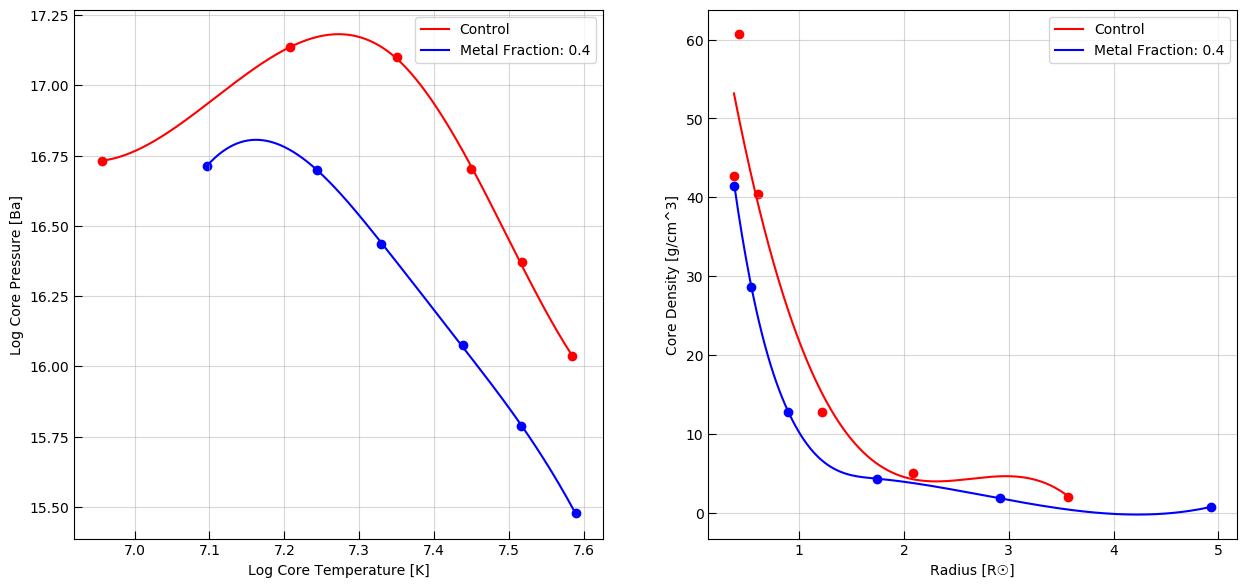

In [276]:
x1 = control_temp_data
x2 = chngmass_maxmetal_temp_data
x3 = 10**control_rad_data*1.437E-11
x4 = 10**chngmass_maxmetal_rad_data*1.437E-11
y1 = control_press_data
y2 = chngmass_maxmetal_press_data
y3 = 10**control_dens_data
y4 = 10**chngmass_maxmetal_dens_data

a,b,c,q,u = np.polyfit(x1,y1,4)
d,e,f,r,v = np.polyfit(x2,y2,4)
g,h,i,s = np.polyfit(x3,y3,3)
n,o,p,t,x,y = np.polyfit(x4,y4,5)

z1 = a*x1**4 + b*x1**3 + c*x1**2 + q*x1 + u
z2 = d*x2**4 + e*x2**3 + f*x2**2 + r*x2 + v
z3 = g*x3**3 + h*x3**2 + i*x3 + s#*x3 + w
z4 = n*x4**5 + o*x4**4 + p*x4**3 + t*x4**2 + x*x4 + y

x1_z1_spline = make_interp_spline(x1, z1)
x2_z2_spline = make_interp_spline(x2, z2)
x3_z3_spline = make_interp_spline(x3, z3)
x4_z4_spline = make_interp_spline(x4, z4)

x1_ = np.linspace(x1.min(), x1.max(), 500)
z1_ = x1_z1_spline(x1_)
x2_ = np.linspace(x2.min(), x2.max(), 500)
z2_ = x2_z2_spline(x2_)
x3_ = np.linspace(x3.min(), x3.max(), 500)
z3_ = x3_z3_spline(x3_)
x4_ = np.linspace(x4.min(), x4.max(), 500)
z4_ = x4_z4_spline(x4_)

fig, ax = plt.subplots(1,2, figsize=(15,10))

ax[0].scatter(x1, y1, c='red', marker='o')
ax[0].scatter(x2, y2, c='blue', marker='o')
ax[1].scatter(x3, y3, c='red', marker='o')
ax[1].scatter(x4, y4, c='blue', marker='o')

ax[0].plot(x1_, z1_, c='red', label='Control')
ax[0].plot(x2_, z2_, c='blue', label='Metal Fraction: 0.4')
ax[1].plot(x3_, z3_, c='red', label='Control')
ax[1].plot(x4_, z4_, c='blue', label='Metal Fraction: 0.4')

ax[0].tick_params(direction='in', length=6, grid_alpha=0.5)
ax[1].tick_params(direction='in', length=6, grid_alpha=0.5)

ax[0].set_xlabel('Log Core Temperature [K]')
ax[1].set_xlabel('Radius [R☉]')

ax[0].set_ylabel('Log Core Pressure [Ba]')
ax[1].set_ylabel('Core Density [g/cm^3]')

#ax[0].set_yscale('log')
#ax[0].set_xscale('log')
#ax[1].set_yscale('log')

ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box')
ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')

ax[0].grid(True,'minor',alpha=0.3)
ax[1].grid(True,'minor',alpha=0.3)
ax[0].grid()
ax[1].grid()

ax[0].legend()
ax[1].legend()

#plt.rcParams['figure.figsize'] = [12,10]
#plt.rcParams['figure.dpi'] = 100
#plt.subplots_adjust(wspace=0.0, hspace=0.05)
plt.show()

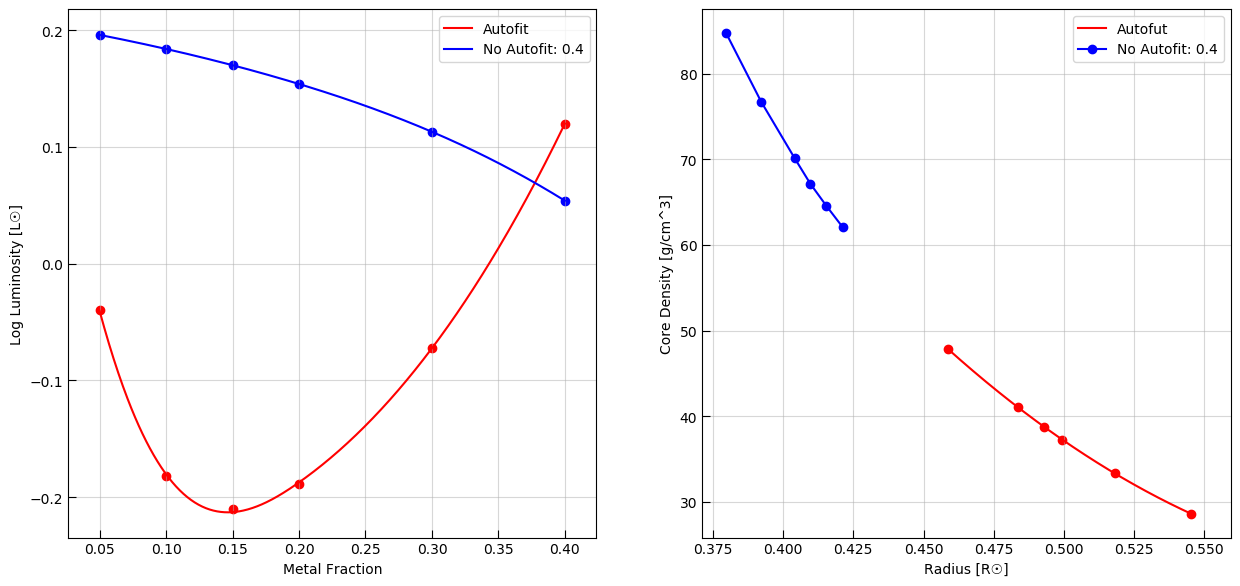

In [285]:
x1 = constmass_chngmetal_metal_data
x2 = constmass_chngmetal_noautofit_metal_data
x3 = 10**constmass_chngmetal_rad_data*1.437E-11
x4 = 10**constmass_chngmetal_noautofit_rad_data*1.437E-11
y1 = constmass_chngmetal_lum_data
y2 = constmass_chngmetal_noautofit_lum_data
y3 = 10**constmass_chngmetal_dens_data
y4 = 10**constmass_chngmetal_noautofit_dens_data

#print(y4==sorted(y4),x4==sorted(x4))

a,b,c,q,u = np.polyfit(x1,y1,4)
d,e,f,r,v = np.polyfit(x2,y2,4)
g,h,i,s = np.polyfit(x3,y3,3)
n,o,p,t,x,y = np.polyfit(x4,y4,5)

z1 = a*x1**4 + b*x1**3 + c*x1**2 + q*x1 + u
z2 = d*x2**4 + e*x2**3 + f*x2**2 + r*x2 + v
z3 = g*x3**3 + h*x3**2 + i*x3 + s#*x3 + w
z4 = n*x4**5 + o*x4**4 + p*x4**3 + t*x4**2 + x*x4 + y

x1_z1_spline = make_interp_spline(x1, z1)
x2_z2_spline = make_interp_spline(x2, z2)
x3_z3_spline = make_interp_spline(x3, z3)
#x4_z4_spline = make_interp_spline(x4, z4)

x1_ = np.linspace(x1.min(), x1.max(), 500)
z1_ = x1_z1_spline(x1_)
x2_ = np.linspace(x2.min(), x2.max(), 500)
z2_ = x2_z2_spline(x2_)
x3_ = np.linspace(x3.min(), x3.max(), 500)
z3_ = x3_z3_spline(x3_)
x4_ = np.linspace(x4.min(), x4.max(), 500)
#z4_ = x4_z4_spline(x4_)

fig, ax = plt.subplots(1,2, figsize=(15,10))

ax[0].scatter(x1, y1, c='red', marker='o')
ax[0].scatter(x2, y2, c='blue', marker='o')
ax[1].scatter(x3, y3, c='red', marker='o')
#ax[1].scatter(x4, y4, c='blue', marker='o')

ax[0].plot(x1_, z1_, c='red', label='Autofit')
ax[0].plot(x2_, z2_, c='blue', label='No Autofit: 0.4')
ax[1].plot(x3_, z3_, c='red', label='Autofut')
ax[1].plot(x4, y4, c='blue', marker='o', label='No Autofit: 0.4')

ax[0].tick_params(direction='in', length=6, grid_alpha=0.5)
ax[1].tick_params(direction='in', length=6, grid_alpha=0.5)

ax[0].set_xlabel('Metal Fraction')
ax[1].set_xlabel('Radius [R☉]')

ax[0].set_ylabel('Log Luminosity [L☉]')
ax[1].set_ylabel('Core Density [g/cm^3]')

#ax[0].set_yscale('log')
#ax[0].set_xscale('log')
#ax[1].set_yscale('log')

ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box')
ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')

ax[0].grid(True,'minor',alpha=0.3)
ax[1].grid(True,'minor',alpha=0.3)
ax[0].grid()
ax[1].grid()

ax[0].legend()
ax[1].legend()

#plt.rcParams['figure.figsize'] = [12,10]
#plt.rcParams['figure.dpi'] = 100
#plt.subplots_adjust(wspace=0.0, hspace=0.05)
plt.show()